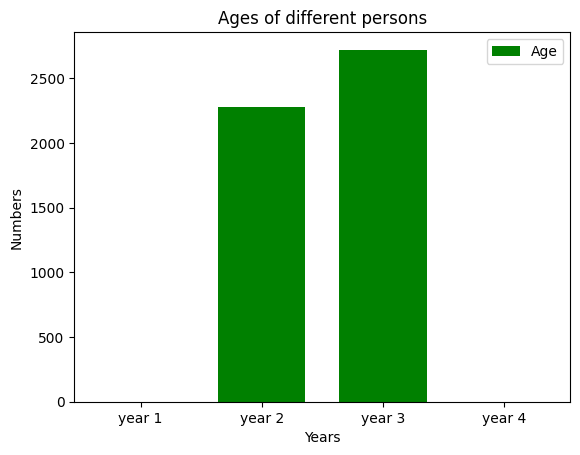

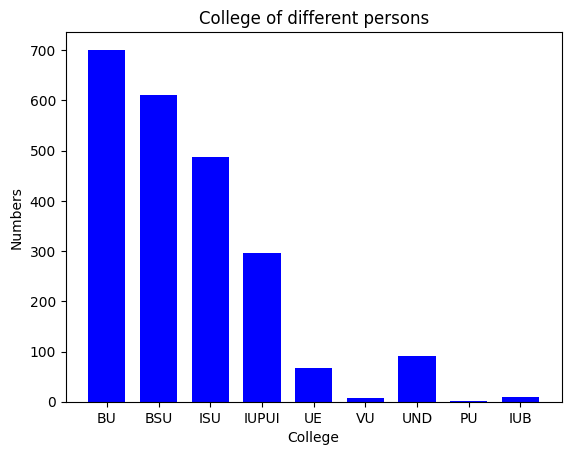

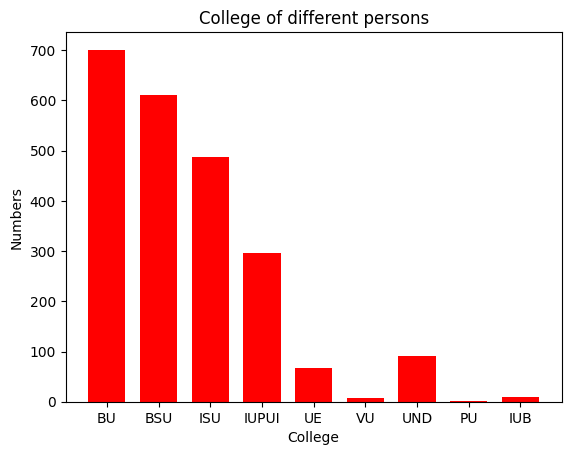

In [10]:
import csv

with open('/content/drive/MyDrive/sample data/dataset.csv') as File:
    lines = csv.reader(File)


import matplotlib.pyplot as plt

y = ['year 1', 'year 2', 'year 3', 'year 4']
x = [0, 0, 0, 0]

year2results = [0, 0, 0, 0, 0, 0, 0, 0, 0]
year3results = [0, 0, 0, 0, 0, 0, 0, 0, 0]

names = ['BU', 'BSU', 'ISU', 'IUPUI', 'UE', 'VU', 'UND', 'PU', 'IUB']

with open('/content/drive/MyDrive/sample data/dataset.csv','r') as csvfile:
    plots = csv.reader(csvfile, delimiter = ',')

    for row in plots:
        if (row[0] == 'Year 2'):
          if (row[2] == 'Butler University'):
            year2results[0] += 1
          elif (row[2] == 'Ball State University'):
            year2results[1] += 1
          elif (row[2] == 'Indiana State University'):
            year2results[2] += 1
          elif (row[2] == 'Indiana University-Purdue University Indianapolis (IUPUI)'):
            year2results[3] += 1
          elif (row[2] == 'University of Evansville'):
            year2results[4] += 1
          elif (row[2] == 'Valparaiso University'):
            year2results[5] += 1
          elif (row[2] == 'University of Notre Dame'):
            year2results[6] += 1
          elif (row[2] == 'Purdue University'):
            year2results[7] += 1
          elif (row[2] == 'Indiana University Bloomington'):
            year2results[8] += 1
          x[1] += 1


        if (row[0] == 'Year 3'):
          if (row[2] == 'Butler University'):
            year3results[0] += 1
          elif (row[2] == 'Ball State University'):
            year3results[1] += 1
          elif (row[2] == 'Indiana State University'):
            year3results[2] += 1
          elif (row[2] == 'Indiana University-Purdue University Indianapolis (IUPUI)'):
            year3results[3] += 1
          elif (row[2] == 'University of Evansville'):
            year3results[4] += 1
          elif (row[2] == 'Valparaiso University'):
            year3results[5] += 1
          elif (row[2] == 'University of Notre Dame'):
            year3results[6] += 1
          elif (row[2] == 'Purdue University'):
            year3results[7] += 1
          elif (row[2] == 'Indiana University Bloomington'):
            year3results[8] += 1
          x[2] += 1


plt.bar(y, x, color = 'g', width = 0.72, label = "Age")
plt.xlabel('Years')
plt.ylabel('Numbers')
plt.title('Ages of different persons')
plt.legend()
plt.show()

plt.bar(names, year2results, color = 'b', width = 0.72)
plt.xlabel('College')
plt.ylabel('Numbers')
plt.title('College of different persons')
plt.show()


plt.bar(names, year2results, color = 'r', width = 0.72)
plt.xlabel('College')
plt.ylabel('Numbers')
plt.title('College of different persons')
plt.show()



In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/sample data/dataset.csv")


# since these categories are labels and not numerical data, we cannot treat them as such and need to transform them
# into a numerical matrix
le = LabelEncoder()
data['Major'] = le.fit_transform(data['Major'])
data['University'] = le.fit_transform(data['University'])
data['Year'] = le.fit_transform(data['Year'])


In [22]:
X = data[['Year', 'Major', 'University', 'Time']]
y = data['Order']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=59)

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# since we are using this data to classify what food item we are trying to predict, let's use a decision tree
model = DecisionTreeClassifier()

model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6704
Classification Report:
                                                           precision    recall  f1-score   support

                        Breaded Pork Tenderloin Sandwich       0.56      0.49      0.52       103
                                  Cornbread Hush Puppies       0.57      0.62      0.59       126
                                    Fried Catfish Basket       0.71      0.66      0.68       137
                        Hoosier BBQ Pulled Pork Sandwich       0.63      0.73      0.68       112
                 Indiana Buffalo Chicken Tacos (3 tacos)       0.63      0.51      0.56       124
    Indiana Corn on the Cob (brushed with garlic butter)       0.76      0.83      0.79       139
                                      Indiana Pork Chili       0.79      0.88      0.83       136
                                         Sugar Cream Pie       0.60      0.62      0.61       114
                                      Sweet Potato Fries       0.65      0.5

In [24]:
import pickle

class CustomOrderPredictor:
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

    def save(self, filename):
        with open(filename, 'wb') as file:
            pickle.dump(self, file)

    @classmethod
    def load(cls, filename):
        with open(filename, 'rb') as file:
            return pickle.load(file)

# Usage example:
custom_model = CustomOrderPredictor(model)
custom_model.fit(X_train, y_train)
custom_model.save("custom_model.pkl")
